In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import nlp
import nltk
import spacy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 

In [74]:
dataset_1 = pd.read_csv('Downloads/amazon_cells_labelled.txt' , sep='\t' , header=None)
dataset_1.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [34]:
column_names = ['review' , 'label']

In [35]:
column_names = ['review' , 'label']

In [36]:
dataset_1.columns = column_names
dataset_1.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [37]:
dataset_2 = pd.read_csv('Downloads/imdb_labelled.txt' , sep ='\t' , header=None)

In [41]:
dataset_2.columns = column_names
dataset_2.head()

,review,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [42]:
dataset_3 = pd.read_csv('Downloads/yelp_labelled.txt' , sep='\t' , header=None)
dataset_3.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [43]:
dataset_3.columns = column_names
dataset_3.head()

,review,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [44]:
dataset = pd.concat([dataset_1, dataset_2, dataset_3], ignore_index=True)
dataset

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [45]:
dataset.shape

(2748, 2)

In [46]:
pd.value_counts(dataset['label'])
     

C:\Users\hepsi\AppData\Local\Temp\ipykernel_17172\3467612695.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(dataset['label'])


label
1    1386
0    1362
Name: count, dtype: int64

<Axes: ylabel='count'>

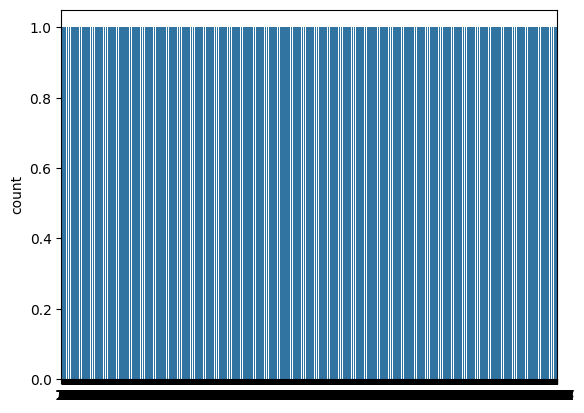

In [47]:
sns.countplot(dataset['label'])

In [48]:
dataset.isna().sum()

review    0
label     0
dtype: int64

In [49]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)

In [51]:
stopwords

['ten',
 'they',
 'there',
 'on',
 'become',
 'hundred',
 'next',
 'even',
 'put',
 'few',
 'side',
 'full',
 'moreover',
 'done',
 "'ve",
 'be',
 'toward',
 'first',
 'nothing',
 'without',
 'him',
 'seemed',
 'do',
 'across',
 'whom',
 'make',
 '’m',
 'did',
 'many',
 'take',
 'from',
 'might',
 'she',
 'these',
 'whereas',
 'rather',
 'though',
 'more',
 'either',
 'name',
 'her',
 'less',
 '‘s',
 'their',
 'so',
 'where',
 'others',
 'whenever',
 'forty',
 'call',
 'regarding',
 'quite',
 'keep',
 'among',
 'have',
 'own',
 'my',
 'still',
 'wherein',
 'sometime',
 'another',
 'sometimes',
 'further',
 '‘d',
 'is',
 'latterly',
 'see',
 'only',
 'thereafter',
 'since',
 'back',
 'whose',
 'nor',
 'anyhow',
 'under',
 'the',
 'then',
 'ever',
 'me',
 'with',
 'everything',
 "'re",
 'before',
 'myself',
 'down',
 "'d",
 'am',
 'such',
 'too',
 'just',
 'being',
 're',
 'top',
 'last',
 'hence',
 'this',
 '’ll',
 'four',
 'eight',
 'has',
 'same',
 'during',
 'part',
 'therein',
 'or'

In [18]:
len(stopwords)

326

In [52]:
def clean_data(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.lemma_ != '-PRON-':
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lemma_
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens


In [108]:
X =dataset.iloc[: , 0].values
y= dataset.iloc[: , 1].values


In [95]:
X[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [96]:
y[1]

1

In [105]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(tokenizer = clean_data)
# X = vectorizer.fit_transform(X).toarray()

from sklearn.feature_extraction.text import CountVectorizer

# # Sample text data
# X = ["This is a sample text.", "This is another sample text."]

# Instantiate the vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the data and transform it
X_ = vectorizer.fit_transform(X).toarray()
X_.shape


(2748, 5155)

In [109]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2 , random_state = 0)

In [99]:
x_train.shape

(1923,)

In [100]:
x_test.shape

(825,)

In [101]:
y_train.shape

(1923,)

In [102]:
y_test.shape

(825,)

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

ValueError: could not convert string to float: 'Awful service.'

In [92]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators = 10 , random_state=0)
classifier.fit(x_train , y_train)

AttributeError: 'RandomForestClassifier' object has no attribute 'fit_transform'

In [ ]:

y_pred = classifier.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm ,annot=True)

In [ ]:
accuracy_score(y_test , y_pred)

Dataset shape: (2748, 2)
Label distribution:
 label
1    1386
0    1362
Name: count, dtype: int64


C:\Users\hepsi\AppData\Local\Temp\ipykernel_17172\193885685.py:31: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print("Label distribution:\n", pd.value_counts(dataset['label']))


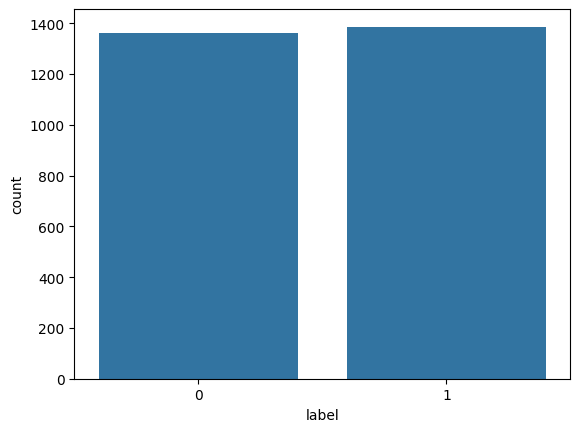

Missing values:
 review    0
label     0
dtype: int64


ValueError: could not convert string to float: 'Good case, Excellent value.'

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the datasets
dataset_1 = pd.read_csv('Downloads/amazon_cells_labelled.txt', sep='\t', header=None)
dataset_2 = pd.read_csv('Downloads/imdb_labelled.txt', sep='\t', header=None)
dataset_3 = pd.read_csv('Downloads/yelp_labelled.txt', sep='\t', header=None)

# Assign column names
column_names = ['review', 'label']
dataset_1.columns = column_names
dataset_2.columns = column_names
dataset_3.columns = column_names

# Combine datasets
dataset = pd.concat([dataset_1, dataset_2, dataset_3], ignore_index=True)

# Check the shape of the combined dataset
print("Dataset shape:", dataset.shape)

# Display value counts of labels
print("Label distribution:\n", pd.value_counts(dataset['label']))

# Plot the distribution of labels
sns.countplot(x='label', data=dataset)
plt.show()

# Check for missing values
print("Missing values:\n", dataset.isna().sum())

# # Load spacy model
# nlp = spacy.load('en_core_web_sm')

# Define punctuation and stopwords
punct = string.punctuation
stopwords = list(STOP_WORDS)

# Function to clean the data
def clean_data(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.lemma_ != '-PRON-':
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lemma_
        tokens.append(temp)
    cleaned_tokens = [token for token in tokens if token not in stopwords and token not in punct]
    return cleaned_tokens

# Prepare features and labels
X = dataset['review'].values
y = dataset['label'].values

from sklearn.feature_extraction.text import CountVectorizer

# # Sample text data
# X = ["This is a sample text.", "This is another sample text."]

# Instantiate the vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the data and transform it
X_ = vectorizer.fit_transform(X).toarray()
X_.shape


# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize and train the classifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(x_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
